

![airline image](http://www.globalflight.net/wp-content/uploads/2014/11/banner1.jpg)


# Airline Customer Satisfaction


## Description

This data given by an airline organization, that it was part of a challenge in *Kaggle*. The actual name of the company is not given.

The dataset consists of the details of customers who have already flown with them. The feedback of the customers on various context and their flight data has been consolidated.

The main purpose of this dataset is to **predict whether a future customer would be satisfied with their service** given the details of the other parameters values.

Also the airline need to know on which aspect of the services offered by them have to be emphasized more to generate more satisfied customers.


## Sections of the notebook


*   [Load dataset](#load-dataset)
*   [EDA](#eda)
    *   [Features Scores and Percentages](#features)
    *   [Analisys of Loyalty customers](#analisys-of-loyalty-customers)
    *   [Correlation between features](#correlation-between-features)
    *   [EDA with PANDAS Profiling](#eda-with-pandas-profiling)
    *   [Categorical data](#categorical-data)
*   [Feature Engineering](#featuring-engineering)
    *   [One hot encoding categorical](#one-hot-encode-categorical)
    *   [Second encode Label Encoding](#label-encoding)
*   [Visualization Data](#visualization-features)
*   [Preparing Modeling](#preparing-modeling)
    *   [Variables Scaling](#preparing-modeling)
    *   [Model with first encoding](#model-first-encoding)
    *   [Model with second encoding](#model-second-encoding)

Importing main libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
import plot_likert

In [2]:
import ipywidgets as widgets

<a id='load-dataset'></a>

## Load dataset

The Airline Customer Satisfaction is a dataset from ***Kaggle*** that contains results of a survey that scores different services offered by an US Airline. The first step is to describe de present data differenciated in categorial info and numerical information.

In [3]:
df = pd.read_csv(r"C:\Users\juanj\Downloads\archive (2)\train.csv", index_col=[0])

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

It is identified that all columns except 'Arrival Delay in Minutes' have nulls values, in order to work with those values, a copy of original dataset is maintained in a new dataframe named "dataset".

In [6]:
dataset = df.copy()

The median value of the arrival delay is used to populate the nulls values of this column. With this change, no nulls values are present.

In [7]:
dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].median())
dataset.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [8]:
#dataset = dataset.dropna()
#dataset.reset_index(inplace=True)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [10]:
#dataset.drop(columns=['index'], inplace=True)

In [11]:
# using interact 
from ipywidgets import interact

<a id='eda'></a>

## EDA

In first place, let's make a view of the main indicator that is the fact whether passenger was satisfied or not, and the associated media of each numeric feature. Online boarding has the maximum value for satisfied customers, the minimum value for dissatisfied customers is for the Inflight wifi service.

In [12]:
dataset.iloc[:,1:].groupby(['satisfaction']).mean()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,,,,,,,,,,,,,,,
neutral or dissatisfied,37.566688,928.919971,2.399633,3.129112,2.546850,2.976121,2.95805,2.656125,3.036295,2.894156,3.019158,2.990812,3.375991,3.042952,3.388814,2.936123,16.503728,17.074594
satisfied,41.750583,1530.140255,3.161288,2.970305,3.031582,2.977879,3.52131,4.027474,3.966530,3.964931,3.857324,3.822143,3.966396,3.646041,3.969461,3.744342,12.608084,12.594892


A view of Loyalty customer, who are not satisfied:

In [13]:
dataset[(dataset['Customer Type'] == 'Loyal Customer') & (dataset['satisfaction'] == 'neutral or dissatisfied')]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103884,6737,Female,Loyal Customer,19,Personal Travel,Eco,334,2,5,2,...,5,3,2,4,3,5,5,25,11.0,neutral or dissatisfied
103893,3397,Female,Loyal Customer,58,Business travel,Business,296,3,3,5,...,3,3,3,3,1,3,1,0,29.0,neutral or dissatisfied
103896,71445,Male,Loyal Customer,57,Business travel,Eco,867,4,5,5,...,4,3,4,3,1,3,4,0,0.0,neutral or dissatisfied
103898,60666,Male,Loyal Customer,50,Personal Travel,Eco,1620,3,1,3,...,2,4,3,4,2,4,2,0,0.0,neutral or dissatisfied


Count of satisfied and dissatisfied customers:

In [14]:
dataset.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

Main indicators of the dataset, percentiles, mean , min, max of each numeric feature.

In [15]:
@interact
def describe(Column=list(dataset.columns)):
    print(dataset[Column].describe())

interactive(children=(Dropdown(description='Column', options=('id', 'Gender', 'Customer Type', 'Age', 'Type of…

<a id='features'></a>
### Features scores and percentages

Separating the indicators columns from the rest of the information, to determine the proportion of each level of the survey ( from 0 to 5), and sorting the values from the maximum level (5) to the minimum(0)

In [16]:
indicators = dataset.columns[7:21]
indicators

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [17]:
percentages = pd.DataFrame()
for item in indicators :
    a=dataset[item].value_counts()
    percentages[item] = a/a.sum()
percentages   

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
3,0.248961,0.172910,0.235304,0.275033,0.214621,0.209848,0.179935,0.184199,0.219751,0.193429,0.198568,0.273772,0.195363,0.236507
2,0.248595,0.165451,0.231185,0.187279,0.211618,0.168473,0.143373,0.169743,0.141294,0.187914,0.110881,0.124086,0.110265,0.155259
4,0.190503,0.245862,0.188357,0.235082,0.234438,0.296062,0.305715,0.283175,0.297072,0.277073,0.359784,0.279633,0.365193,0.261578
1,0.171697,0.149157,0.168665,0.169021,0.123547,0.102903,0.116213,0.120092,0.114259,0.099640,0.069651,0.124057,0.068178,0.128176
5,0.110381,0.215612,0.133306,0.133575,0.214746,0.199347,0.254754,0.242657,0.227595,0.237402,0.261116,0.198443,0.260972,0.218365
0,0.029864,0.051009,0.043184,0.000010,0.001030,0.023368,0.000010,0.000135,0.000029,0.004543,NaN,0.000010,0.000029,0.000115


In [18]:
percentages = percentages.sort_index(ascending=False)
percentages

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
5,0.110381,0.215612,0.133306,0.133575,0.214746,0.199347,0.254754,0.242657,0.227595,0.237402,0.261116,0.198443,0.260972,0.218365
4,0.190503,0.245862,0.188357,0.235082,0.234438,0.296062,0.305715,0.283175,0.297072,0.277073,0.359784,0.279633,0.365193,0.261578
3,0.248961,0.172910,0.235304,0.275033,0.214621,0.209848,0.179935,0.184199,0.219751,0.193429,0.198568,0.273772,0.195363,0.236507
2,0.248595,0.165451,0.231185,0.187279,0.211618,0.168473,0.143373,0.169743,0.141294,0.187914,0.110881,0.124086,0.110265,0.155259
1,0.171697,0.149157,0.168665,0.169021,0.123547,0.102903,0.116213,0.120092,0.114259,0.099640,0.069651,0.124057,0.068178,0.128176
0,0.029864,0.051009,0.043184,0.000010,0.001030,0.023368,0.000010,0.000135,0.000029,0.004543,NaN,0.000010,0.000029,0.000115


Visualization of some of the features and their percentages, in this case Inflight wifi service, for all surveyed customers.

<AxesSubplot:ylabel='Inflight wifi service'>

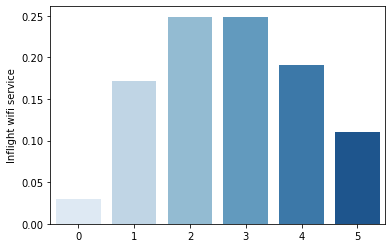

In [19]:
%matplotlib inline
sns.barplot(x=percentages.index, y="Inflight wifi service", data=percentages , order=[0,1,2,3,4,5] ,palette = "Blues")

<AxesSubplot:ylabel='Departure/Arrival time convenient'>

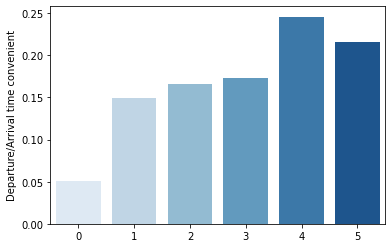

In [20]:
sns.barplot(x=percentages.index, y="Departure/Arrival time convenient", data=percentages , palette = "Blues")

<AxesSubplot:ylabel='Ease of Online booking'>

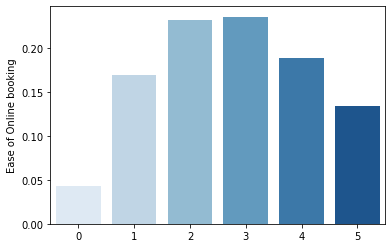

In [21]:
sns.barplot(x=percentages.index, y="Ease of Online booking", data=percentages, palette = "Blues")

<AxesSubplot:ylabel='Online boarding'>

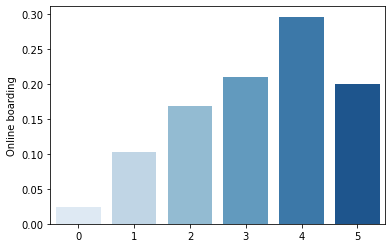

In [22]:
sns.barplot(x=percentages.index, y="Online boarding", data=percentages, palette = "Blues")

<AxesSubplot:ylabel='Inflight entertainment'>

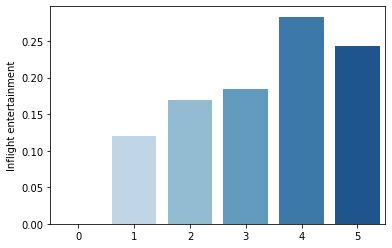

In [23]:
sns.barplot(x=percentages.index, y="Inflight entertainment", data=percentages, palette = "Blues")

<AxesSubplot:ylabel='Cleanliness'>

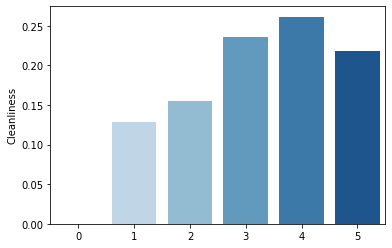

In [24]:
sns.barplot(x=percentages.index, y="Cleanliness", data=percentages, palette = "Blues")

<AxesSubplot:ylabel='Food and drink'>

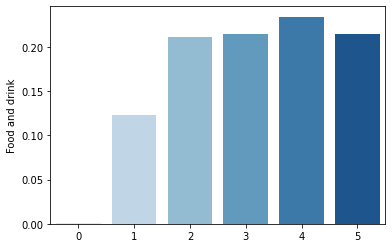

In [25]:
sns.barplot(x=percentages.index, y="Food and drink", data=percentages, palette = "Blues")

<a id='analisys-of-loyalty-customers'></a>
### Analysis of Loyalty customers

In [26]:
data = dataset['Customer Type'].value_counts()

Clasification of the customers, based on their affiliation to loyalty program - a majority of them (82%) are loyal members.

([<matplotlib.patches.Wedge at 0x2433be22108>,
 [Text(-1.1757055906355427, 0.7600765515053926, 'Loyal Customers'),
  Text(0.9405645009738341, -0.608061197173313, 'Disloyal Customers')],
 [Text(-0.7558107368371345, 0.48862064025346663, '82%'),
  Text(0.5206696344676581, -0.33660530557808394, '18%')])

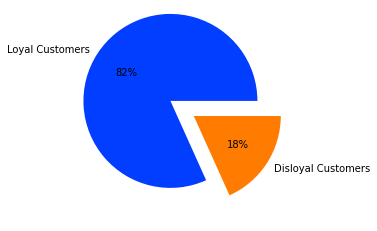

In [27]:
labels = ['Loyal Customers', 'Disloyal Customers']
colors = sns.color_palette('bright')
explode = [0.3,0.02]
plt.pie(data, labels=labels,colors = colors, autopct = '%0.0f%%', explode = explode)

The following graphs depictes the relationship of the other variables that were not part of the survey, but describe the characteristics of the samples (Customer age, lenght of the taken flight, and time delays in departure and arrival), divided in loyal and non-loyal customers.

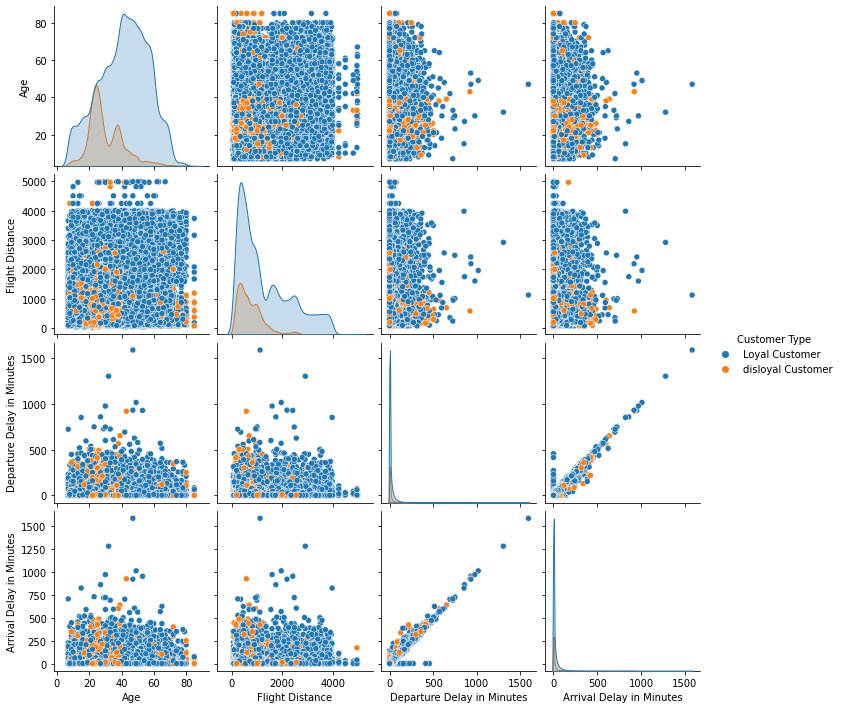

In [28]:
sns.pairplot(dataset, vars = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'] , diag_kind="kde", hue='Customer Type' ) 

A subset of these customers (loyal customers) and the statistics of them which satisfaction is negative or neutral, what is denominated unhappy loyalty customers.

In [29]:
loyalty_unhappy = dataset[(dataset['Customer Type'] == 'Loyal Customer') & (dataset['satisfaction'] == 'neutral or dissatisfied')]

In [30]:
@interact
def describe(Column=list(loyalty_unhappy.columns)):
    print(loyalty_unhappy[Column].describe())

interactive(children=(Dropdown(description='Column', options=('id', 'Gender', 'Customer Type', 'Age', 'Type of…

The unhappy loyal customers gave in average a low score to inflight wifi service.

In [31]:
loyalty_unhappy.describe().sort_values('mean', axis=1).iloc[1,]

Inflight wifi service                    2.401397
Ease of Online booking                   2.596711
Online boarding                          2.731426
Inflight entertainment                   2.849628
Cleanliness                              2.900743
Leg room service                         2.933566
Food and drink                           2.940662
Gate location                            2.953345
On-board service                         2.999932
Checkin service                          3.037734
Seat comfort                             3.052872
Baggage handling                         3.314395
Inflight service                         3.329736
Departure/Arrival time convenient        3.403942
Departure Delay in Minutes              16.715003
Arrival Delay in Minutes                17.282474
Age                                     39.678509
Flight Distance                       1000.468844
id                                   64779.186438
Name: mean, dtype: float64

Frequent users are mainly dissatisfied with these services that make up the top 5:

In [32]:
loyalty_unhappy.describe().sort_values('mean', axis=1).iloc[1,].head(5)

Inflight wifi service     2.401397
Ease of Online booking    2.596711
Online boarding           2.731426
Inflight entertainment    2.849628
Cleanliness               2.900743
Name: mean, dtype: float64

On the contrary, these loyal users, rated with higher value, the following services

In [33]:
loyalty_happy = dataset[(dataset['Customer Type'] == 'Loyal Customer') & (dataset['satisfaction'] == 'satisfied')]
loyalty_happy.describe().sort_values('mean', axis=1, ascending=False).iloc[1,][5:10]

Online boarding           4.071695
Seat comfort              4.071078
Inflight entertainment    4.060223
Inflight service          3.954284
Baggage handling          3.950559
Name: mean, dtype: float64

<a id='correlation-between-features'></a>
### Correlation between features

Let's see how all the variables correlate with each other

In [34]:
dataset.corr()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.036997
Age,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105
Flight Distance,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470
Inflight wifi service,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042
Departure/Arrival time convenient,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918
Ease of Online booking,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947
Gate location,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178
Food and drink,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466
Online boarding,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021874
Seat comfort,0.052903,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029735


In [35]:
corr = dataset.corr()
corr.style.background_gradient(cmap = 'Blues')

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
id,1.000000,0.022857,0.095544,-0.021276,-0.002110,0.014163,-0.000606,0.001063,0.055477,0.052903,0.002300,0.055241,0.044634,0.074940,0.079273,0.079346,0.024965,-0.019546,-0.036997
Age,0.022857,1.000000,0.099461,0.017859,0.038125,0.024842,-0.001330,0.023000,0.208939,0.160277,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105
Flight Distance,0.095544,0.099461,1.000000,0.007131,-0.020043,0.065717,0.004793,0.056994,0.214869,0.157333,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470
Inflight wifi service,-0.021276,0.017859,0.007131,1.000000,0.343845,0.715856,0.336248,0.134718,0.456970,0.122658,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042
Departure/Arrival time convenient,-0.002110,0.038125,-0.020043,0.343845,1.000000,0.436961,0.444757,0.004906,0.070119,0.011344,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918
Ease of Online booking,0.014163,0.024842,0.065717,0.715856,0.436961,1.000000,0.458655,0.031873,0.404074,0.030014,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947
Gate location,-0.000606,-0.001330,0.004793,0.336248,0.444757,0.458655,1.000000,-0.001159,0.001688,0.003669,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178
Food and drink,0.001063,0.023000,0.056994,0.134718,0.004906,0.031873,-0.001159,1.000000,0.234468,0.574556,0.622512,0.059073,0.032498,0.034746,0.087299,0.033993,0.657760,-0.029926,-0.032466
Online boarding,0.055477,0.208939,0.214869,0.456970,0.070119,0.404074,0.001688,0.234468,1.000000,0.420211,0.285066,0.155443,0.123950,0.083280,0.204462,0.074573,0.331517,-0.018982,-0.021874
Seat comfort,0.052903,0.160277,0.157333,0.122658,0.011344,0.030014,0.003669,0.574556,0.420211,1.000000,0.610590,0.131971,0.105559,0.074542,0.191854,0.069218,0.678534,-0.027898,-0.029735


Variables with the highest positive correlation: Ease of Online booking - Inflight wifi service, inflight entertainment - Cleanliness, inflight entertainment - Food & drink, Seat Comfort - Cleanliness, Departure Delay in Minutes - Arrival Delay in Minutes. Major Negative correlation between 

A better representation of the correlation, using a heatmap

<AxesSubplot:>

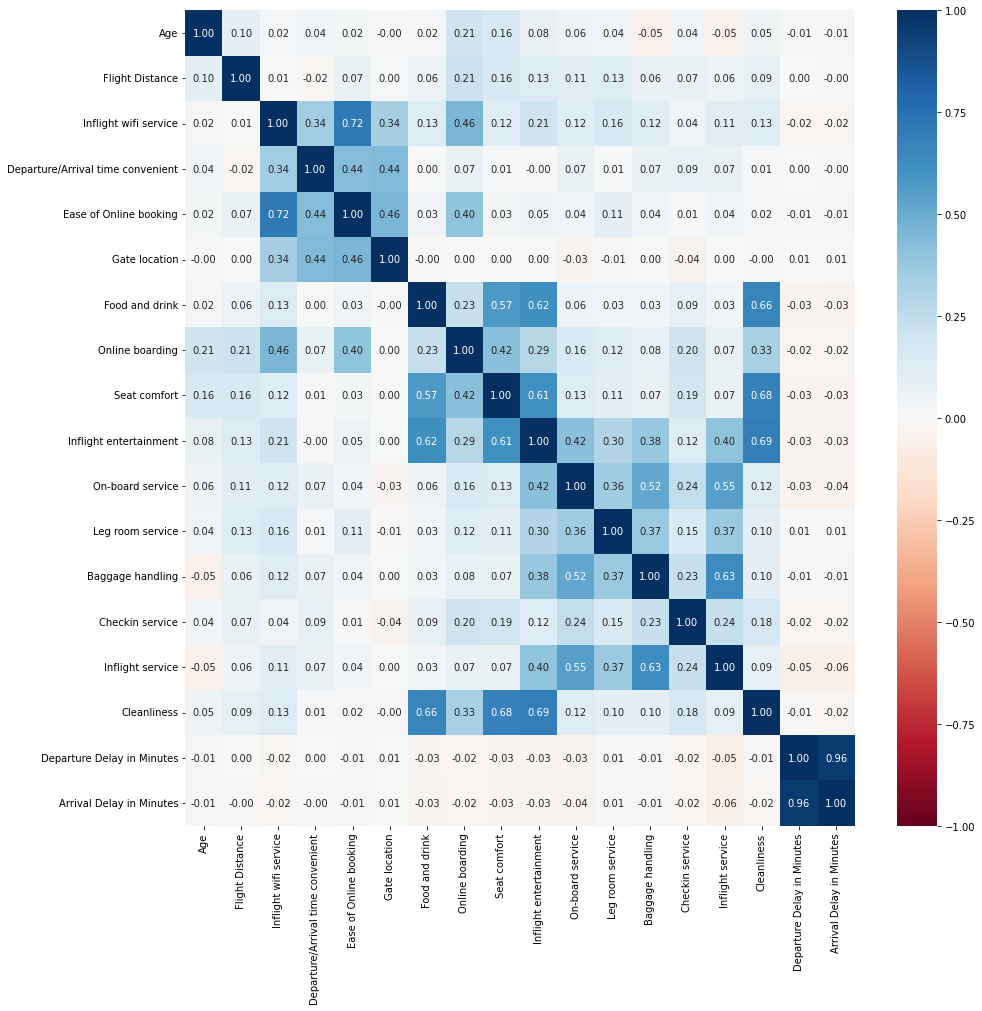

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr.iloc[1:,1:], cmap='RdBu', annot=True, fmt='.2f',
           vmin=-1, vmax=1)

The following graphs depictes the relationship of the other variables that were not part of the survey,  describe a comparison of the characteristics of the samples (Customer age, lenght of the taken flight, and time delays in departure and arrival), clasified per travel class

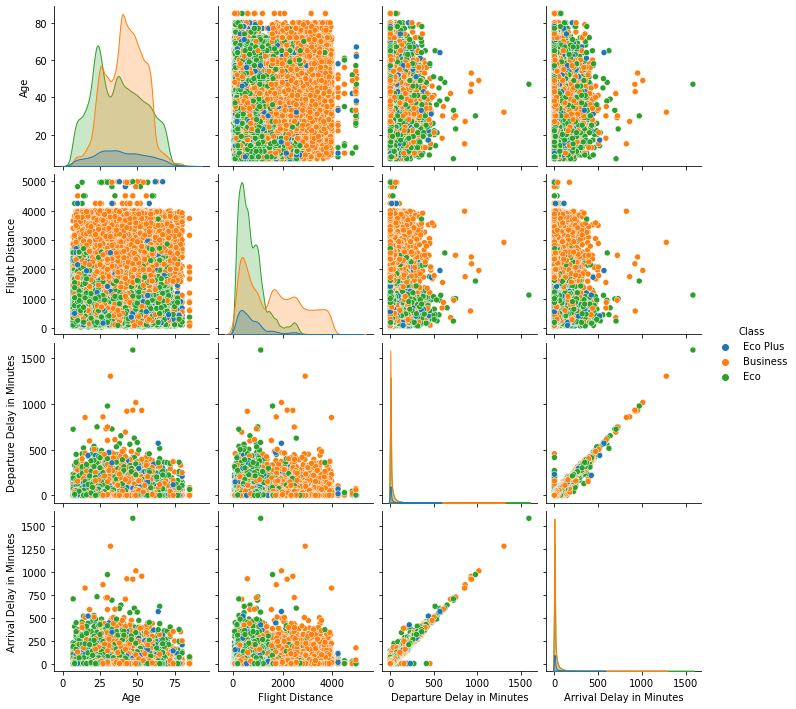

In [37]:
sns.pairplot(dataset, vars = ['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes'] , diag_kind="kde", hue='Class')

<a id='correlation-between-features'></a>
### Delayed flights analysis

A second option is to consider differently the NaN (nulls) in the column "Arrival Delay":

In [38]:
df.isna().sum()['Arrival Delay in Minutes']

310

The Arrival Delay in Minutes column has NaN values, which must be modified to a numerical value. In order not to affect the results appreciably, we see a relationship with the Departure Delay in Minutes variable, which when it is 0, the most likely is that the flight is not delayed, so we will replace the NaN values with 0 in the Arrival Delay in Minutes column:

In [39]:
df.loc[~df['Arrival Delay in Minutes'].isna() | df['Departure Delay in Minutes'] == 0]

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
2630,3638,Male,Loyal Customer,35,Business travel,Business,1534,1,1,1,...,5,5,5,5,5,5,5,0,NaN,satisfied
4588,27120,Male,Loyal Customer,33,Business travel,Business,2701,3,3,3,...,5,4,5,5,2,5,5,0,NaN,satisfied
5296,47977,Female,Loyal Customer,47,Personal Travel,Eco,834,1,1,1,...,3,3,1,2,4,3,2,0,NaN,neutral or dissatisfied
7225,97948,Male,Loyal Customer,48,Business travel,Business,391,1,1,1,...,5,5,5,5,4,5,5,0,NaN,satisfied
8035,64304,Female,Loyal Customer,40,Business travel,Business,2075,5,5,5,...,2,2,2,2,4,2,4,0,NaN,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98636,7116,Male,Loyal Customer,54,Personal Travel,Eco,157,2,4,2,...,2,3,4,4,3,4,2,0,NaN,neutral or dissatisfied
100962,51361,Female,Loyal Customer,51,Business travel,Eco Plus,77,2,2,2,...,2,2,2,2,2,2,4,0,NaN,neutral or dissatisfied
101532,74223,Female,Loyal Customer,61,Personal Travel,Eco,1746,4,3,4,...,3,3,4,4,2,3,2,0,NaN,neutral or dissatisfied
102552,27684,Female,disloyal Customer,29,Business travel,Eco,1107,2,1,1,...,5,4,1,5,5,3,5,0,NaN,neutral or dissatisfied


Number of flights departing with 0 delay whose arrival time is undetermined (NaN) = 116 matches.

It is convenient to verify the assumption that flights that do not depart with delay, also arrive without delay, proceed to make this query:

In [40]:
df.loc[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes'] > 0 ), ['Departure Delay in Minutes','Arrival Delay in Minutes']]

,Departure Delay in Minutes,Arrival Delay in Minutes
17,0,10.0
20,0,4.0
27,0,8.0
35,0,1.0
51,0,1.0
...,...,...
103866,0,4.0
103867,0,24.0
103868,0,1.0
103874,0,13.0


Percentage of on-time departure flights that arrived late

In [41]:
len( df.loc[(df['Departure Delay in Minutes'] == 0) & (df['Arrival Delay in Minutes'] > 0 )] ) / len(df[df['Departure Delay in Minutes'] == 0]) 

0.1890809299788641

In this case, we can not assume that every flight with cero time departure, has cero arrival time, to replace Nulls values

Let's assume to all NaN (nulls) cases to be dropped, with a new dataset

In [42]:
dataset2 = df.dropna()

In [43]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103594 non-null  int64  
 1   Gender                             103594 non-null  object 
 2   Customer Type                      103594 non-null  object 
 3   Age                                103594 non-null  int64  
 4   Type of Travel                     103594 non-null  object 
 5   Class                              103594 non-null  object 
 6   Flight Distance                    103594 non-null  int64  
 7   Inflight wifi service              103594 non-null  int64  
 8   Departure/Arrival time convenient  103594 non-null  int64  
 9   Ease of Online booking             103594 non-null  int64  
 10  Gate location                      103594 non-null  int64  
 11  Food and drink                     1035

We will use dataset **(NaN values filled with median value)** and dataset2 **(with NaN values dropped)** for our models to predict satisfaction, based on categorical and customer data and services survey scoring

<a id='eda-with-pandas-profiling'></a>

### EDA with pandas profiling

This is a fast method to visualize analysis of data , could provide some valuable information for an initial discovery

In [44]:
profile = ProfileReport(df, title="Raw Airline Satisfaction Analysis", explorative=True)
profile.to_file("airlines-report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<a id='categorical-data'></a>

### Categorical Variables description

A brief description of the values on each variable , and their distribution

In [45]:
dataset.Gender.value_counts()

Female    52727
Male      51177
Name: Gender, dtype: int64

In [46]:
dataset['Customer Type'].value_counts()

Loyal Customer       84923
disloyal Customer    18981
Name: Customer Type, dtype: int64

In [47]:
dataset['Type of Travel'].value_counts()

Business travel    71655
Personal Travel    32249
Name: Type of Travel, dtype: int64

In [48]:
dataset.Class.value_counts()

Business    49665
Eco         46745
Eco Plus     7494
Name: Class, dtype: int64

The variable "satisfaction" will be our target variable for prediction:

In [49]:
dataset.satisfaction.value_counts()

neutral or dissatisfied    58879
satisfied                  45025
Name: satisfaction, dtype: int64

The dataset has 2 columns those decribe important facts to be considered, the delay in departure and arrival of the flight. A summary of their statistics

In [50]:
dataset['Departure Delay in Minutes'].describe()

count    103904.000000
mean         14.815618
std          38.230901
min           0.000000
25%           0.000000
50%           0.000000
75%          12.000000
max        1592.000000
Name: Departure Delay in Minutes, dtype: float64

<AxesSubplot:xlabel='satisfaction', ylabel='Departure Delay in Minutes'>

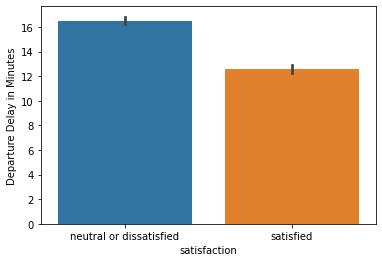

In [51]:
sns.barplot(y="Departure Delay in Minutes" , x = 'satisfaction', data=dataset)


<AxesSubplot:xlabel='satisfaction', ylabel='Arrival Delay in Minutes'>

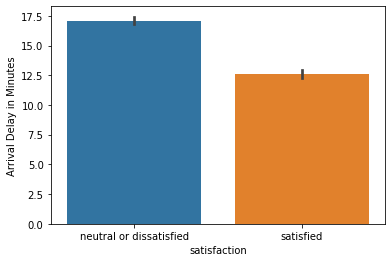

In [52]:
sns.barplot(y="Arrival Delay in Minutes" , x = 'satisfaction', data=dataset)

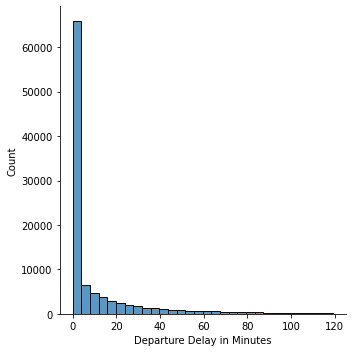

In [53]:
sns.displot(dataset[dataset['Departure Delay in Minutes'] < 120 ], x="Departure Delay in Minutes", bins=30)

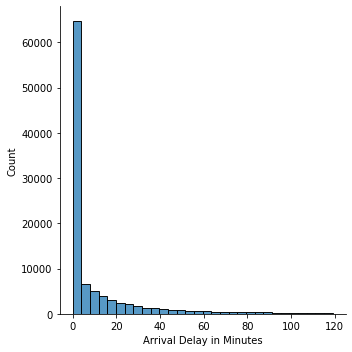

In [54]:
sns.displot(dataset[dataset['Arrival Delay in Minutes'] < 120 ], x="Arrival Delay in Minutes", bins=30)

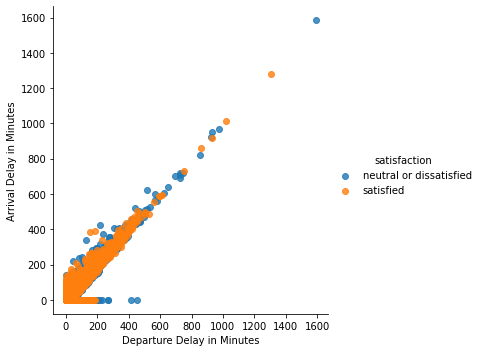

In [55]:
sns.lmplot(x='Departure Delay in Minutes',y='Arrival Delay in Minutes', data=dataset , hue = 'satisfaction', fit_reg = False)

More visualizations for flights with departure delays : less than 2-hours delay,  less than 1-hours delay and less than 30 minutes delays

In [56]:
delay = dataset[(dataset['Departure Delay in Minutes'] > 0) & (dataset['Departure Delay in Minutes'] < 120)]

In [57]:
delay_30m= dataset.loc[(dataset['Departure Delay in Minutes'] > 0) & (dataset['Departure Delay in Minutes'] < 30)]

In [58]:
delay_1= dataset.loc[(dataset['Departure Delay in Minutes'] > 30) & (dataset['Departure Delay in Minutes'] < 60)]

Violin plot for Departures and Arrival for each type of departure delay

<AxesSubplot:xlabel='Departure Delay in Minutes'>

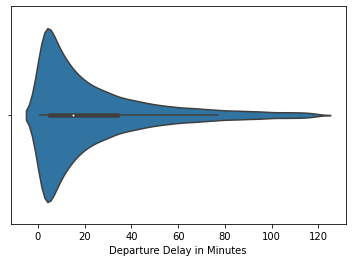

In [59]:
sns.violinplot(data=delay, x='Departure Delay in Minutes', scale="count")

<AxesSubplot:xlabel='Arrival Delay in Minutes'>

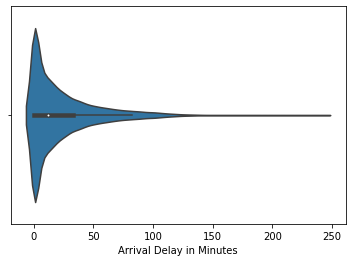

In [60]:
sns.violinplot(data=delay, x='Arrival Delay in Minutes', scale="count")

<AxesSubplot:ylabel='Departure Delay in Minutes'>

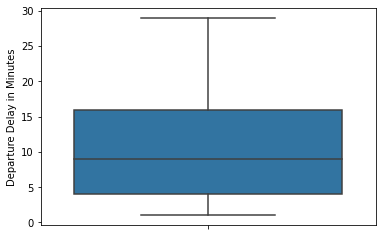

In [61]:
sns.boxplot(data=delay_30m, y='Departure Delay in Minutes')

<AxesSubplot:ylabel='Departure Delay in Minutes'>

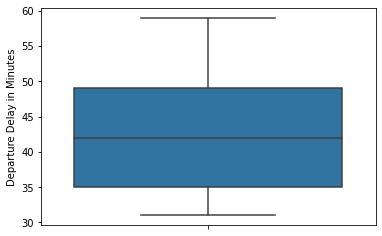

In [62]:
sns.boxplot(data=delay_1, y='Departure Delay in Minutes')

<AxesSubplot:xlabel='Class', ylabel='Cleanliness'>

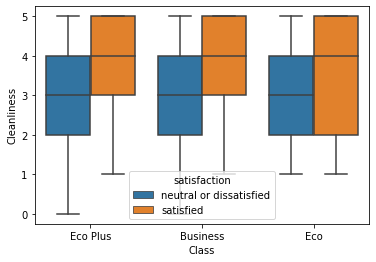

In [63]:
sns.boxplot(x="Class" , y= "Cleanliness", hue = 'satisfaction', data=delay)

<AxesSubplot:xlabel='Class', ylabel='Inflight wifi service'>

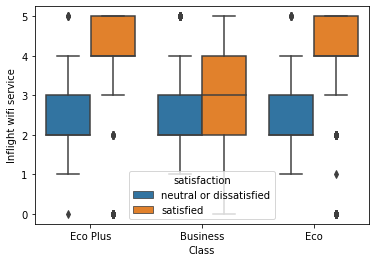

In [64]:
sns.boxplot(x="Class" , y= "Inflight wifi service", hue = 'satisfaction', data=delay)

<AxesSubplot:xlabel='Type of Travel', ylabel='Seat comfort'>

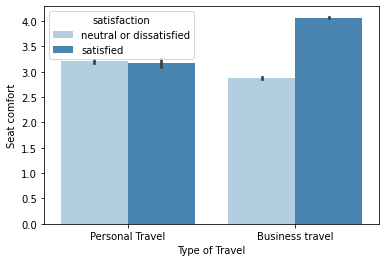

In [65]:
sns.barplot(x="Type of Travel" , y= "Seat comfort", hue = 'satisfaction', data=delay, palette = "Blues")

<AxesSubplot:xlabel='Type of Travel', ylabel='Seat comfort'>

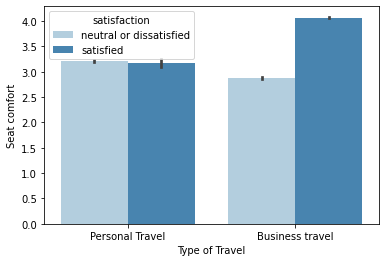

In [66]:
sns.barplot(x="Type of Travel" , y= "Seat comfort", hue = 'satisfaction' , data=delay , palette = "Blues")

In [67]:
@interact
def describe(Column=list(delay.columns)):
    print(delay[Column].describe())

interactive(children=(Dropdown(description='Column', options=('id', 'Gender', 'Customer Type', 'Age', 'Type of…

In [68]:
%matplotlib inline 

@interact
def graph(
    Bins=(1,50,5),
    grid= True ,
    Color=['blue', 'red','gray'],
    ):
    dataset.loc[:,'Age'].plot(kind='hist', 
                            bins= Bins, 
                            color=Color, 
                            grid=grid)

interactive(children=(IntSlider(value=21, description='Bins', max=50, min=1, step=5), Checkbox(value=True, des…

In [69]:
@interact
def graph(
    Bins=(1,100,5),
    grid= True ,
    Color=['blue', 'red','gray'],
    ):
    delay.loc[:,'Flight Distance'].plot(kind='hist', 
                            bins= Bins, 
                            color=Color, 
                            grid=grid,
                             )

interactive(children=(IntSlider(value=46, description='Bins', min=1, step=5), Checkbox(value=True, description…

<a id='featuring-engineering'></a>

## Feature engineering

<a id='one-hot-encode-categorical'></a>
    
### One-hot encode categorical variables

Different encoding tecniques will be applied in order to manage the categorical variables. For this project, we will apply OneHot Encoding and Label encoding, and how these encoding impact the prediction model. Firstly, using the One Hot Encoder module, categorical variable will be convert numerical values to be considered in the prediction model of satisfaction.

In [70]:
from sklearn.preprocessing import OneHotEncoder
maker_encoder = OneHotEncoder()

In [71]:
lista = ["Gender", "Customer Type", "Type of Travel","Class"]
list_actual = ["Gender_act", "Customer Type_act", "Type of Travel_act","Class_act"]
maker_encoder.fit(dataset[lista])
mkr = maker_encoder.transform(dataset[lista]).todense()

In [72]:
mkr.shape

(103904, 9)

In [73]:
data = []
for x in maker_encoder.categories_:
    data.append(x.tolist())

flat_list = [item for l in data for item in l]
    
flat_list

['Female',
 'Male',
 'Loyal Customer',
 'disloyal Customer',
 'Business travel',
 'Personal Travel',
 'Business',
 'Eco',
 'Eco Plus']

The final encode using this library is as follows for the categorical variables

In [74]:
encode = pd.DataFrame(mkr, columns=flat_list)
encode

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
103899,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
103900,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
103901,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
103902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


<a id='label-encoding'></a>
### Second encode -- Label Encoding

For this encoding , each possible value of a variable is assigned a numeric value 

In [75]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer

le = LabelEncoder()
norm = Normalizer()

In [76]:
encode2 = pd.DataFrame(columns=lista)
for col in lista:
    encode2[col] = le.fit_transform(dataset[col])

In [77]:
encode2.isna().sum()

Gender            0
Customer Type     0
Type of Travel    0
Class             0
dtype: int64

Encode2 will contain the label encoding

In [78]:
encode2

,Gender,Customer Type,Type of Travel,Class
0,1,0,1,2
1,1,1,0,0
2,0,0,0,0
3,0,0,0,0
4,1,0,0,0
...,...,...,...,...
103899,0,1,0,1
103900,1,0,0,0
103901,1,1,0,0
103902,0,1,0,1


<a id='feature-engineering-survey'></a>
### Feature Engineering : Survey questions

Separating the most relevant variables for the model

In [79]:
features = ['Age']+list(df.columns[6:23])

In [80]:
type(features)

list

In [81]:
features

['Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [82]:
df.loc[:, features].mean()

Age                                    39.379706
Flight Distance                      1189.448375
Inflight wifi service                   2.729683
Departure/Arrival time convenient       3.060296
Ease of Online booking                  2.756901
Gate location                           2.976883
Food and drink                          3.202129
Online boarding                         3.250375
Seat comfort                            3.439396
Inflight entertainment                  3.358158
On-board service                        3.382363
Leg room service                        3.351055
Baggage handling                        3.631833
Checkin service                         3.304290
Inflight service                        3.640428
Cleanliness                             3.286351
Departure Delay in Minutes             14.815618
Arrival Delay in Minutes               15.178678
dtype: float64

In [83]:
df.loc[:, features].var()

Age                                     228.462128
Flight Distance                      994302.699066
Inflight wifi service                     1.763131
Departure/Arrival time convenient         2.325854
Ease of Online booking                    1.957004
Gate location                             1.632315
Food and drink                            1.767657
Online boarding                           1.821174
Seat comfort                              1.739992
Inflight entertainment                    1.776864
On-board service                          1.659857
Leg room service                          1.730816
Baggage handling                          1.394533
Checkin service                           1.601227
Inflight service                          1.382184
Cleanliness                               1.722060
Departure Delay in Minutes             1461.601759
Arrival Delay in Minutes               1497.587990
dtype: float64

<a id='preparing-modeling'></a>

## Preparing Modeling

### Variables Scaling

In [84]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
x = dataset.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [85]:
df_features_scaled = pd.DataFrame(x, columns=features)
df_features_scaled

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,1.352264,-0.185532,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,-1.656326,-0.185532,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,1.352264,1.296496,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,-0.904178,-0.926545,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,0.600117,1.296496,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,-0.904178,-0.926545,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554
103900,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,-0.904178,0.555482,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554
103901,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,0.600117,-1.667559,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325
103902,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,-1.656326,-1.667559,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554


<a id='model-first-encoding'></a>
### Model with first encoding

In [86]:
model = pd.concat([encode,df_features_scaled] , axis=1)
model

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,Age,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.745279,...,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.951360,...,-1.849315,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.885200,...,1.183099,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.951360,...,-1.091211,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.430397,...,1.183099,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.083680,...,-1.091211,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554
103900,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.636478,...,1.183099,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554
103901,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.620561,...,1.183099,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325
103902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.149840,...,-1.849315,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554


Labeling of target data

In [87]:
model['satisfaction'] = df.satisfaction.map({'neutral or dissatisfied':0,'satisfied':1})

In [88]:
model

,Female,Male,Loyal Customer,disloyal Customer,Business travel,Personal Travel,Business,Eco,Eco Plus,Age,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,-1.745279,...,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169,0
1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.951360,...,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,0
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.885200,...,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554,1
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,-0.951360,...,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,0
4,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.430397,...,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.083680,...,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554,0
103900,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.636478,...,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554,1
103901,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,-0.620561,...,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325,0
103902,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,-1.149840,...,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554,0


In [89]:
X = model.iloc[:,0:27]
y = model.iloc[:,27]

In [90]:
# Spliting arrays or matrices into random train and test subsets
from sklearn.model_selection import train_test_split
# i.e. 70 % training dataset and 30 % test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [91]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9625304760682664


In [92]:
model.columns[0:27]

Index(['Female', 'Male', 'Loyal Customer', 'disloyal Customer',
       'Business travel', 'Personal Travel', 'Business', 'Eco', 'Eco Plus',
       'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

The variables used to predict in order of importance

In [93]:
feature_imp = pd.Series(clf.feature_importances_, index = model.columns[0:27]).sort_values(ascending = False)
feature_imp

Online boarding                      0.186193
Inflight wifi service                0.134984
Business                             0.066475
Personal Travel                      0.063407
Business travel                      0.050143
Inflight entertainment               0.047536
Seat comfort                         0.042542
Eco                                  0.039818
Ease of Online booking               0.034991
Leg room service                     0.033928
Flight Distance                      0.029242
Age                                  0.028091
Loyal Customer                       0.027786
Checkin service                      0.025434
Cleanliness                          0.024839
Inflight service                     0.024419
disloyal Customer                    0.024044
Baggage handling                     0.023725
On-board service                     0.023617
Gate location                        0.014524
Departure/Arrival time convenient    0.013725
Arrival Delay in Minutes          

<a id='model-second-encoding'></a>
### Model with second encoding

Trying with the second encoding

In [94]:
model = pd.concat([encode2,df_features_scaled] , axis=1)

In [95]:
model['satisfaction'] = df.satisfaction.map({'neutral or dissatisfied':0,'satisfied':1})
model

,Gender,Customer Type,Type of Travel,Class,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,1,2,-1.745279,-0.731539,0.203579,0.616172,0.173776,-1.547323,...,1.231704,0.479403,-0.266840,0.311769,0.549799,1.156436,1.305870,0.266393,0.074169,0
1,1,1,0,0,-0.951360,-0.957184,0.203579,-0.695245,0.173776,0.018094,...,-1.769081,-1.849161,1.253380,-0.535045,-1.821012,0.305848,-1.742292,-0.361375,-0.236313,0
2,0,0,0,0,-0.885200,-0.047584,-0.549533,-0.695245,-0.541060,-0.764614,...,1.231704,0.479403,-0.266840,0.311769,0.549799,0.305848,1.305870,-0.387532,-0.391554,1
3,0,0,0,0,-0.951360,-0.629246,-0.549533,1.271880,1.603448,1.583511,...,-1.018885,-1.072973,1.253380,-0.535045,-1.821012,0.305848,-0.980251,-0.099805,-0.158692,0
4,1,0,0,0,1.430397,-0.978244,0.203579,-0.039537,0.173776,0.018094,...,-0.268688,-0.296785,0.493270,0.311769,-0.240472,-0.544740,-0.218211,-0.387532,-0.391554,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,0,1,-1.083680,-1.000307,-0.549533,-1.350954,-0.541060,0.018094,...,-1.018885,-0.296785,-1.787061,0.311769,-1.030742,-0.544740,-0.980251,-0.309061,-0.391554,0
103900,1,0,0,0,0.636478,1.160869,0.956691,0.616172,0.888612,0.800803,...,1.231704,1.255590,1.253380,1.158582,1.340069,1.156436,0.543829,-0.387532,-0.391554,1
103901,1,1,0,0,-0.620561,0.807860,-1.302646,-1.350954,-1.255895,0.018094,...,0.481508,-0.296785,-1.026951,0.311769,1.340069,1.156436,0.543829,-0.204433,-0.029325,0
103902,0,1,0,1,-1.149840,-0.189991,-1.302646,-1.350954,-1.255895,1.583511,...,-1.769081,0.479403,1.253380,-2.228672,1.340069,0.305848,-1.742292,-0.387532,-0.391554,0


In [96]:
X = model.iloc[:,0:22]
y = model.iloc[:,22]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [98]:
from sklearn.ensemble import RandomForestClassifier

# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 
 
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
 
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
 
# metrics are used to find accuracy or error
from sklearn import metrics 
print()
 
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9623379956371102


The feature importance has some slight differences, compared with the 2 models

In [99]:
feature_imp = pd.Series(clf.feature_importances_, index = model.columns[0:22]).sort_values(ascending = False)
feature_imp
#sns.histplot(data = feature_imp, x=feature_imp.index, bins=20)

Online boarding                      0.175429
Inflight wifi service                0.141054
Class                                0.109521
Type of Travel                       0.089362
Inflight entertainment               0.056667
Seat comfort                         0.041146
Leg room service                     0.038585
Flight Distance                      0.038350
Ease of Online booking               0.037617
Customer Type                        0.033343
Age                                  0.031216
On-board service                     0.030768
Cleanliness                          0.026524
Baggage handling                     0.026383
Inflight service                     0.025036
Checkin service                      0.023233
Departure/Arrival time convenient    0.017595
Gate location                        0.016489
Arrival Delay in Minutes             0.012751
Food and drink                       0.012749
Departure Delay in Minutes           0.011269
Gender                            

<a id='visualization-features'></a>
## Visualization survey features

For better visualization, numeric vales of scores will be converted to a text description acording to the level of satisfaction , hence we can use the properties of likert scale , being the maximum value (5) as "strongly satisfied"  and the minimum (1) as "strongly disatisfied". As cero value does not count as a minimum, in this first scenario we are not counting this response.

Counting the number of ocurrences of each likert scale for each of the survey features

In [100]:
metrics2 = ['Strongly disagree', 'Disagree', 'Neither agree nor disagree', 'Agree', 'Strongly agree']

In [101]:
services = dataset.iloc[:,7:20]

In [102]:
for service in services.columns:
    services[service]=services[service].map({1:'Strongly disagree', 2:'Disagree', 3:'Neither agree nor disagree', 4:'Agree', 5:'Strongly agree'})
services

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
0,Neither agree nor disagree,Agree,Neither agree nor disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,Strongly agree
1,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree
2,Disagree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,Agree
3,Disagree,Strongly agree,Strongly agree,Strongly agree,Disagree,Disagree,Disagree,Disagree,Disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree
4,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Disagree,Strongly disagree,Disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Strongly disagree,Agree,Disagree,Neither agree nor disagree
103900,Agree,Agree,Agree,Agree,Disagree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
103901,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Agree,Strongly disagree,Strongly agree,Agree,Neither agree nor disagree,Disagree,Agree,Strongly agree,Strongly agree
103902,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly disagree,Strongly agree,Agree


In [103]:
a = pd.DataFrame()
for service in services.columns:
    temp = services[service].value_counts()
    temp = pd.DataFrame(temp)
    a = pd.concat([a,temp] , axis = 1)

In [104]:
likert_data = a.T
likert_data

,Neither agree nor disagree,Disagree,Agree,Strongly disagree,Strongly agree
Inflight wifi service,25868,25830,19794,17840,11469
Departure/Arrival time convenient,17966,17191,25546,15498,22403
Ease of Online booking,24449,24021,19571,17525,13851
Gate location,28577,19459,24426,17562,13879
Food and drink,22300,21988,24359,12837,22313
Online boarding,21804,17505,30762,10692,20713
Seat comfort,18696,14897,31765,12075,26470
Inflight entertainment,19139,17637,29423,12478,25213
On-board service,22833,14681,30867,11872,23648
Leg room service,20098,19525,28789,10353,24667


C:\Users\juanj\anaconda3\envs\streamlit\lib\site-packages\plot_likert\plot_likert.py:173: UserWarning: In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader.
  "In your data, not all questions have the same number of responses. i.e., different numbers of people answered each question. Therefore, the percentages aren't directly comparable: X% for one question represents a different number of responses than X% for another question, yet they will appear the same in the percentage graph. This may be misleading to your reader."


<AxesSubplot:xlabel='Percentage of Responses'>

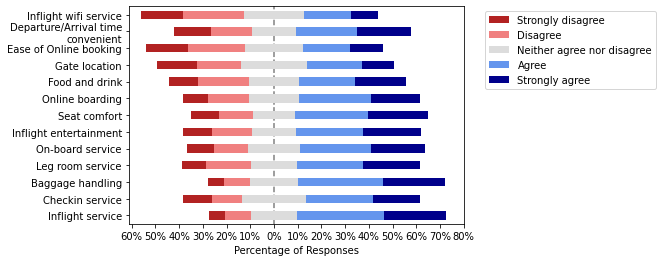

In [105]:
import plot_likert
%matplotlib inline
plot_likert.plot_likert(services, plot_likert.scales.agree, plot_percentage=True)

An error is received because zero responses were discarted an there is a mistmach between the number of responses and the number of questions. Something different should be assumed for zero response.

#### Analizing Zero response

In [106]:
services = dataset.iloc[:,7:20]

In this case, sero response is mapped to neutral response on the likert scale meaning "Neither agree nor disagree" , to use the module funciotns to deisply likert scales.

In [107]:
for service in services.columns:
    services[service]=services[service].map({0:'Neither agree nor disagree',1:'Strongly disagree', 2:'Disagree', 3:'Neither agree nor disagree', 4:'Agree', 5:'Strongly agree'})
services

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service
0,Neither agree nor disagree,Agree,Neither agree nor disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,Strongly agree
1,Neither agree nor disagree,Disagree,Neither agree nor disagree,Neither agree nor disagree,Strongly disagree,Neither agree nor disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree
2,Disagree,Disagree,Disagree,Disagree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Agree,Neither agree nor disagree,Agree,Agree,Agree
3,Disagree,Strongly agree,Strongly agree,Strongly agree,Disagree,Disagree,Disagree,Disagree,Disagree,Strongly agree,Neither agree nor disagree,Strongly disagree,Agree
4,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Agree,Strongly agree,Strongly agree,Neither agree nor disagree,Neither agree nor disagree,Agree,Agree,Neither agree nor disagree,Neither agree nor disagree
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Disagree,Strongly disagree,Disagree,Neither agree nor disagree,Disagree,Disagree,Disagree,Disagree,Neither agree nor disagree,Strongly disagree,Agree,Disagree,Neither agree nor disagree
103900,Agree,Agree,Agree,Agree,Disagree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree
103901,Strongly disagree,Strongly disagree,Strongly disagree,Neither agree nor disagree,Agree,Strongly disagree,Strongly agree,Agree,Neither agree nor disagree,Disagree,Agree,Strongly agree,Strongly agree
103902,Strongly disagree,Strongly disagree,Strongly disagree,Strongly agree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Agree,Strongly agree,Strongly disagree,Strongly agree,Agree


<AxesSubplot:xlabel='Percentage of Responses'>

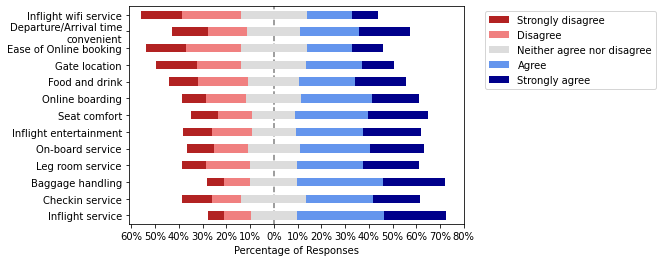

In [108]:
plot_likert.plot_likert(services, plot_likert.scales.agree, plot_percentage=True)

No error in execution is present

## Author

[Juan Jacobo Figueroa](https://www.linkedin.com/in/juanjfigueroa/)